In [ ]:

#importing required libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

from wordcloud import WordCloud, ImageColorGenerator
import re
from nltk.tokenize import word_tokenize as wt
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import io
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline


In [ ]:
#to upload csv file
from google.colab import files


uploaded = files.upload()


Saving spam_ham_dataset.csv to spam_ham_dataset.csv


Latin-1 Encoding:
It is a character encoding standard that maps each character to a unique byte value between 0 and 255.Latin-1 encoding is needed when working with text data that includes characters outside the ASCII character set.Latin-1 encoding allows characters in different languages (like spanish,german)to be represented as single bytes in the text file, which makes it possible to handle them in text processing tasks.


In [ ]:
df = pd.read_csv('spam_ham_dataset.csv',delimiter=',',encoding='latin-1')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
#spam_words contains all the words from the text column which are labelled as spam in 'label_num' column of the datadrame
spam_words = ' '.join(list(df[df['label_num'] == 1]['text']))

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#to see frequency of words in spam mails before removal of stopwords and special characters
from nltk import FreqDist
spam_token = nltk.tokenize.word_tokenize(spam_words)
spam_freq = FreqDist(spam_token)
spam_freq

FreqDist({'.': 19489, ',': 11227, '-': 7941, 'the': 7254, ':': 6111, '/': 5707, 'to': 5160, 'and': 4903, 'of': 4490, '?': 4101, ...})

In [ ]:
#converting all text to lower case
df['text'] =df['text'].apply(str.lower)
#removing all special symbols by replacing them with space
df['text'] = df['text'].str.replace('\W', ' ', regex=True)
df['text'] = df['text'].str.replace('subject', ' ')
stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

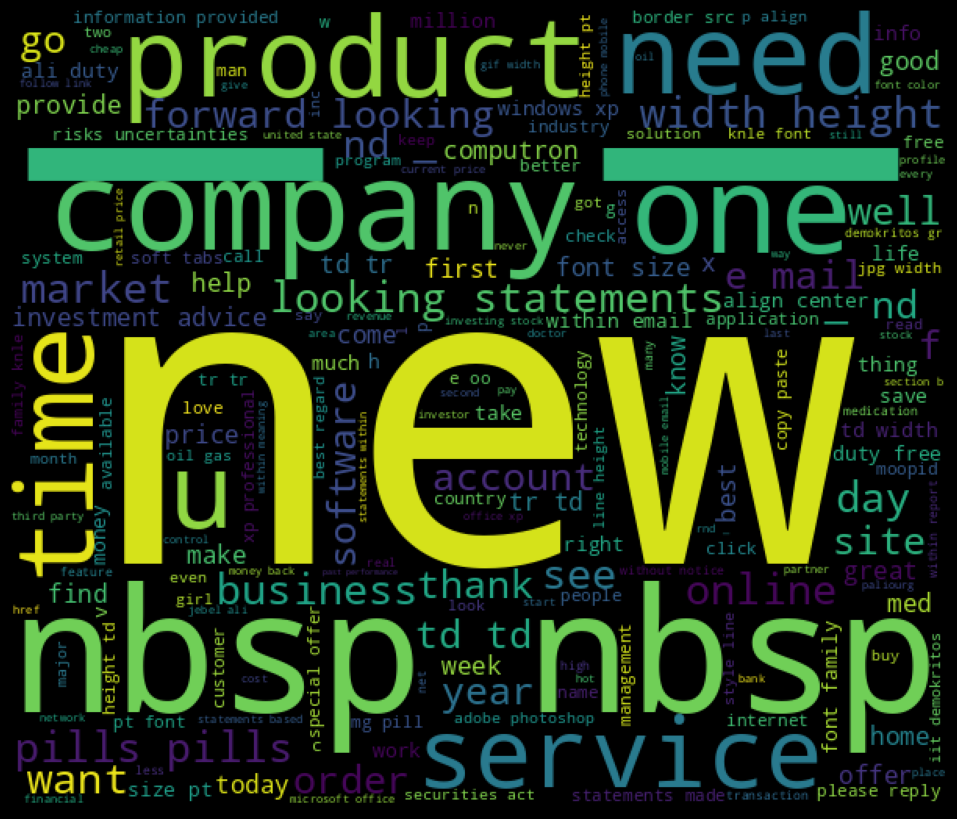

In [ ]:
#word cloud of spam mails
spam_words = ' '.join(list(df[df['label_num'] == 1]['text']))
spam_wc = WordCloud(width = 600,height = 512).generate(spam_words)

plt.figure(figsize = (12, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

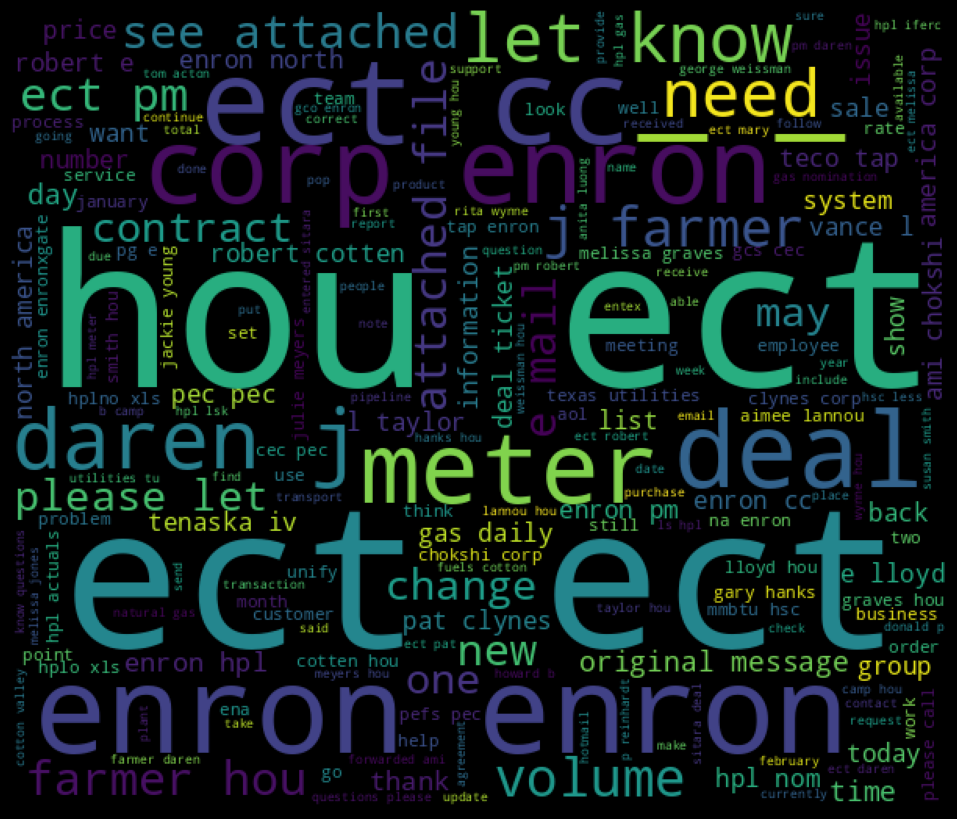

In [ ]:
#word cloud of real mails
ham_words = ' '.join(list(df[df['label_num'] == 0]['text']))
ham_wc = WordCloud(width = 600,height = 512).generate(ham_words)

plt.figure(figsize = (12, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
#removing numeric values from text
df['text'] = df['text'].str.replace('\d+', ' ')

<ipython-input-11-658d4472c9e1>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', ' ')


In [ ]:
lemmatizer= WordNetLemmatizer()

In [ ]:
#lemmatization
all_data_lemma = []
for i in range(df.shape[0]):
    sp = df.iloc[i, 2]
    sp = re.sub('[^A-Za-z]', ' ', sp)
    sp = sp.lower()
    tokenized_sp = wt(sp)
    sp_processed = []
    for word in tokenized_sp:
        if word not in set(stopwords.words('english')):
            sp_processed.append(lemmatizer.lemmatize(word))
    sp_text = " ".join(sp_processed)
    all_data_lemma.append(sp_text)

The first line assigns the text column of the df DataFrame to the variable X. This will be the input data for the model.

The second line assigns the label_num column of the df DataFrame to the variable Y. This column contains the target labels for the model.

The third line creates a LabelEncoder object, which is used to convert the categorical labels in Y to numerical labels that the machine learning algorithm can work with.The LabelEncoder class is used to convert categorical data (such as text labels) into numerical data that can be used by machine learning models. It works by assigning a unique integer value to each category in the data. For example, if the data has three categories: "red", "green", and "blue", the LabelEncoder will assign the values 0, 1, and 2 to these categories, respectively.This is necessary because most machine learning algorithms require numerical data as input.

The fourth line applies the fit_transform method of the LabelEncoder object to the Y data. This method first fits the encoder to the unique values in the Y data and then transforms the labels to numerical values. The transformed labels are assigned back to Y.

The fifth line reshapes the Y array so that it has only one column and the number of rows is automatically determined based on the number of elements in the array. This is often necessary for compatibility with machine learning algorithms that expect a certain shape of the input and output data.

In [ ]:
X = all_data_lemma
Y = df.label_num
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

This line of code splits the preprocessed data into training and testing sets

The function takes two or more arrays as input, where the first array (X in this case) represents the input data and the second array (Y in this case) represents the corresponding output or target values. The test_size parameter specifies the proportion of the data that should be reserved for testing, while the remaining data is used for training the model.

In this specific case, the training data will contain 85% of the preprocessed data, while the remaining 15% will be used for testing. This split is a common practice in machine learning to evaluate how well the model generalizes to unseen data.

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)


```
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
```
Creates and Initializes a Tokenizer object.

The Tokenizer is a text processing utility that converts text into sequences of integers. The num_words parameter sets the maximum number of words to keep in the vocabulary, based on word frequency.

This means that only the top max_words most frequent words will be kept in the vocabulary, while all other words will be discarded. This can help reduce the dimensionality of the input data and speed up training time.


```
tok.fit_on_texts(X_train)
```
fits the tokenizer object to training data


```
sequences = tok.texts_to_sequences(X_train)
```
sequences = tok.texts_to_sequences(X_train) is a method of the Keras Tokenizer object that converts the input texts X_train into sequences of integer indices using the vocabulary learned during the fitting step.

The texts_to_sequences() method takes a list of texts as input and returns a list of sequences, where each sequence corresponds to the integer indices of the words in the input text.


```
sequences_matrix = pad_sequences(sequences,maxlen=max_len)
```
sequences_matrix = pad_sequences(sequences, maxlen=max_len) is a method of the Keras preprocessing utility pad_sequences, which is used to ensure that all sequences in a list have the same length.

The pad_sequences() method takes a list of sequences (in this case, the sequences of integer indices generated by the Tokenizer's texts_to_sequences() method) and pads each sequence with zeros at the beginning or end (depending on the value of the padding parameter) so that all sequences have the same length.


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)


```
 inputs = Input(name='inputs',shape=[max_len])
```
this code is defining an input layer named "inputs" that expects input data in the form of a 1D array of size max_len.

```
layer = Embedding(max_words,50,input_length=max_len)(inputs)
```




```
layer = LSTM(64)(layer)
```
defines an LSTM layer with 64 memory units(or neurons). This layer processes the embedded input sequence and generates a sequence of outputs.



```
layer = Dense(256,name='FC1')(layer)
```
Dense(): This function creates a fully connected dense layer in a neural network. It takes an integer argument as the number of neurons in the layer, which is 256 in this case.

name: This parameter is optional and sets the name of the layer. In this case, it's set to 'FC1' to indicate that this is the first fully connected layer.

layer: This is the input to the dense layer. In the previous line, it was the output from an LSTM layer.



```
layer = Dropout(0.5)(layer)
```
The next line defines a dropout layer with a rate of 0.5. This layer randomly drops out 50% of the output units during training to prevent overfitting.



```
layer = Dense(1,name='out_layer')(layer)
```
Another dense layer, but with 1 neuron because we want one output



```
layer = Activation('sigmoid')(layer)
```
Since we want a binary classification output (either 0 or 1), the sigmoid activation function is used. This function maps the input to a value between 0 and 1, which can be interpreted as the probability of the input



```
 model = Model(inputs=inputs,outputs=layer)
```
Model(): This function creates a Keras model with a specified input and output layers.

inputs: This parameter specifies the input layer of the model. In this case, it's the inputs layer that was defined earlier in the code.

outputs: This parameter specifies the output layer of the model. In this case, it's the layer that was defined as the final output layer in the previous line.


Overall Explaination:
The model takes the input layer, processes it through multiple layers including an LSTM layer, a dense layer, a ReLU activation layer, a dropout layer, and a final dense layer with a sigmoid activation function. The output of the model is a binary classification output indicating the probability of the input sequence belonging to class 1.
This code defines a neural network model that takes in a sequence of words as input and produces a binary classification output, with an LSTM layer used to process the sequential data.













In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model



```
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
```


model = RNN(): This line creates an instance of the RNN model.

model.summary(): This line displays a summary of the model's architecture, including the number of parameters and the shape of each layer's output.

model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy']): This line compiles the model by specifying the loss function, optimizer, and evaluation metric. The loss function is binary cross-entropy, which is commonly used for binary classification problems. The optimizer is RMSprop, which is a popular gradient descent optimization algorithm. Finally, the evaluation metric is accuracy, which is a common metric used to evaluate classification models.

In [ ]:
model = RNN()
model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


The fit() method is used to train the machine learning model on a given dataset. Let's break down the arguments used in this particular line of code:

sequences_matrix: This is the input data, which has been preprocessed and transformed into a matrix of fixed length sequences using the pad_sequences() function.

Y_train: This is the target data, which contains the true labels for the input sequences.

batch_size: This specifies the number of samples to be processed at each step of the training process. In this case, 128 samples will be processed at each step.

epochs: This specifies the number of times the entire training dataset will be passed through the model. In this case, the model will be trained for 10 epochs.

validation_split: This specifies the proportion of the training data to be used for validation. In this case, 20% of the training data will be used for validation during training.

callbacks: This is a list of callback functions to be applied during training. In this case, the EarlyStopping callback is used to stop training early if the validation loss does not improve for a certain number of epochs.

In [ ]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)
Y_pred = model.predict(test_sequences_matrix)

In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)

In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

In [ ]:
Testing_context = ["Dear Sarah,I hope this email finds you well. I wanted to check in and see how you're doing. It's been a while since we last caught up and I'm interested to hear about what's been going on in your life.On my end, things have been going pretty well. I recently started a new job at a software company and it's been keeping me pretty busy. But I'm enjoying the work and learning a lot.Aside from work, I've been trying to get back into running. I signed up for a 10K race next month, so I've been training for that. It's been a challenge, but I'm looking forward to the race.Anyway, I don't want to ramble on too much. Let me know how you're doing and what you've been up to lately. Maybe we can catch up over coffee sometime soon.Take care,John"]

txts = tok.texts_to_sequences(Testing_context)
txts = pad_sequences(txts, maxlen=max_len)

In [ ]:
preds = model.predict(txts)
print(preds)

In [ ]:
Testing_context = [" astro baseball season ticketssection row seats original message from kitchen louisesent tuesday march amto hillis kimberlysubject astro baseball season ticketswhere are they from john lavorato enron enronxgate enronxgate amsent kimberly hillis enron enronxgateto phillip allen hou ect ect david duran hou ect ect joseph deffner enron enronxgate brian redmond hou ect ect colleen sullivan hou ect ect mike grigsby hou ect ect mike swerzbin hou ect ect john arnold hou ect ect kevin presto hou ect ect hunter shively hou ect ect fletcher sturm hou ect ect rogers herndon hou ect ect barry tycholiz enron enron dana davis enron enronxgate fred lagrasta hou ect ect thomas martin hou ect ect scott neal hou ect ect edward baughman enron enronxgate harry arora enron enronxgate don miller hou ect ect ozzie pagan enron enronxgate michael miller enron enron richard lydecker corp enron enron jim schwieger hou ect ect carl tricoli corp enron enron frank vickers enron enron mark whitt enron enron mcmichael hou ect ect jesse neyman hou ect ect greg blair corp enron enron douglas clifford ect ect michael miller enron communications enron communications allan keel enron enronxgate scott josey enron enronxgate bruce sukaly enron enronxgate julie gomez hou ect ect jean mrha enron enron john thompson enron enronxgate steve pruett enron enronxgate gil muhl corp enron enron michelle parks enron enronxgate brad alford enron enron robert greer hou ect ectcc louise kitchen hou ect ect tammie schoppe hou ect ectsubject astro baseball season ticketsthe astro season about kick off and enron americas office the chairman has four tickets each game available for customer events you are interested using the tickets please call kim hillis "]

txts = tok.texts_to_sequences(Testing_context)
txts = pad_sequences(txts, maxlen=max_len)

preds = model.predict(txts)
print(preds)


In [ ]:
import pickle

In [ ]:
model.save('LSTM_retrained.h5')
with open('tokenizer_retrained.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=3)